### Download Necessary Files

In [20]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Downloaded CDBRFS08.ASC.gz


In [17]:
import warnings
warnings.filterwarnings('ignore')

### Excercise 9.1

#### Hypothesis Testing on Pregency Length

In [18]:
# Function for reading Data
def readnsfg():
    import nsfg
       
    #Read data
    df = nsfg.ReadFemPreg()

    #Select only sucessful delivery
    live = df[df.outcome == 1]

    #Select first and other child
    first = live[live.birthord == 1]
    others = live[live.birthord != 1]

    #Get Pregnency length
    first_preglength = first.prglngth.values
    other_preglength = others.prglngth.values
    
    return first_preglength, other_preglength

# Function for doing ttest

def ttest(first_len,other_len):
    import numpy as np
    import scipy.stats as stats

    # Perform an independent t-test
    t_stat, p_value = stats.ttest_ind(first_len, other_len)

    # Display results
    print(f"No of Records: {len(first_len)}")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in pregnancy lengths. \n")
    else:
        print("Fail to reject the null hypothesis: No significant difference in pregnancy lengths. \n")


# Looping with decreased sample
import numpy as np
first_len,other_len = readnsfg()
i = len(first_len)
for x in range(5):
    if i == 0:
        break
    first_len = np.random.choice(first_len,size=i,replace=True)
    other_len = np.random.choice(other_len,size=i,replace=True)
    ttest(first_len,other_len)    
    i = int(i/2)

No of Records: 4413
T-statistic: 2.351
P-value: 0.019
Reject the null hypothesis: There is a significant difference in pregnancy lengths. 

No of Records: 2206
T-statistic: 0.980
P-value: 0.327
Fail to reject the null hypothesis: No significant difference in pregnancy lengths. 

No of Records: 1103
T-statistic: 0.258
P-value: 0.796
Fail to reject the null hypothesis: No significant difference in pregnancy lengths. 

No of Records: 551
T-statistic: 0.819
P-value: 0.413
Fail to reject the null hypothesis: No significant difference in pregnancy lengths. 

No of Records: 275
T-statistic: 0.251
P-value: 0.802
Fail to reject the null hypothesis: No significant difference in pregnancy lengths. 



### Excercise 10.1

#### Linear leastsquares fit for log(weight) versus height

Linear Regression Equation: log(weight) = 0.9571 * height + -82.6593


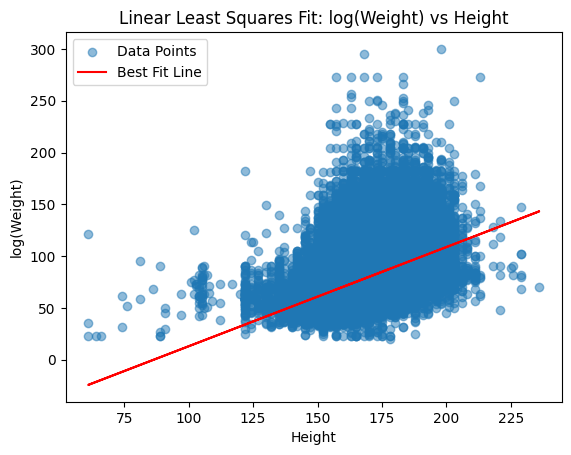

In [ ]:
import brfss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the BRFSS dataset
df = brfss.ReadBrfss(nrows=None)

# Extract height and weight 
df = df[['htm3', 'wtkg2']].dropna()  # Remove missing values

# Apply log transformation to weight
df['log_weight'] = np.log(df['wtkg2'])

# Compute least squares regression
X = df['htm3']
Y = df['wtkg2']

# Calculate slope (m) and intercept (b) using least squares formula
A = np.vstack([X, np.ones(len(X))]).T  # Create design matrix
m, b = np.linalg.lstsq(A, Y, rcond=None)[0]  # Least squares fit

# Print the regression equation
print(f"Linear Regression Equation: log(weight) = {m:.4f} * height + {b:.4f}")

# Plot the data and regression line
plt.scatter(X, Y, alpha=0.5, label="Data Points")
plt.plot(X, m*X + b, color='red', label="Best Fit Line")
plt.xlabel("Height")
plt.ylabel("log(Weight)")
plt.legend()
plt.title("Linear Least Squares Fit: log(Weight) vs Height")
plt.show()


In [22]:
heights = df["htm3"].dropna()
weights = df["wtkg2"].dropna()

# Number of bootstrap samples
n_boot = 1000  

# Function for bootstrapping
def bootstrap_sample(data, weights=None):
    """ Resamples the data with or without weights and computes mean height """
    means = []
    for _ in range(n_boot):
        if weights is None:
            sample = np.random.choice(data, size=len(data), replace=True)
        else:
            sample = np.random.choice(data, size=len(data), replace=True, p=weights/weights.sum())
        means.append(sample.mean())
    return np.array(means)

# Bootstrap sampling WITHOUT weights
means_unweighted = bootstrap_sample(heights)

# Bootstrap sampling WITH weights
means_weighted = bootstrap_sample(heights, weights)

# Compute mean, standard error, and confidence intervals
def compute_stats(bootstrap_means):
    mean_est = bootstrap_means.mean()
    se = bootstrap_means.std()
    ci_lower, ci_upper = np.percentile(bootstrap_means, [5, 95])  # 90% CI
    return mean_est, se, (ci_lower, ci_upper)

# Results for unweighted and weighted estimates
mean_unweighted, se_unweighted, ci_unweighted = compute_stats(means_unweighted)
mean_weighted, se_weighted, ci_weighted = compute_stats(means_weighted)

# Print results
print("Unweighted Estimates:")
print(f"Mean Height: {mean_unweighted:.2f}, SE: {se_unweighted:.2f}, 90% CI: {ci_unweighted}")

print("\nWeighted Estimates:")
print(f"Mean Height: {mean_weighted:.2f}, SE: {se_weighted:.2f}, 90% CI: {ci_weighted}")

Unweighted Estimates:
Mean Height: 168.96, SE: 0.02, 90% CI: (np.float64(168.9289010236666), np.float64(168.981951054993))

Weighted Estimates:
Mean Height: 170.26, SE: 0.02, 90% CI: (np.float64(170.2378906960529), np.float64(170.2905626629479))
